In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set(style="whitegrid")

In [9]:
df = pd.read_csv("Unemployment in India.csv")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [10]:
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]
df.rename(columns={'region': 'state'}, inplace=True)

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract year and month
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Drop missing values
df.dropna(inplace=True)

# Check basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   state                                    740 non-null    object        
 1   date                                     740 non-null    datetime64[ns]
 2   frequency                                740 non-null    object        
 3   estimated_unemployment_rate_(%)          740 non-null    float64       
 4   estimated_employed                       740 non-null    float64       
 5   estimated_labour_participation_rate_(%)  740 non-null    float64       
 6   area                                     740 non-null    object        
 7   year                                     740 non-null    float64       
 8   month                                    740 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(3)
memor

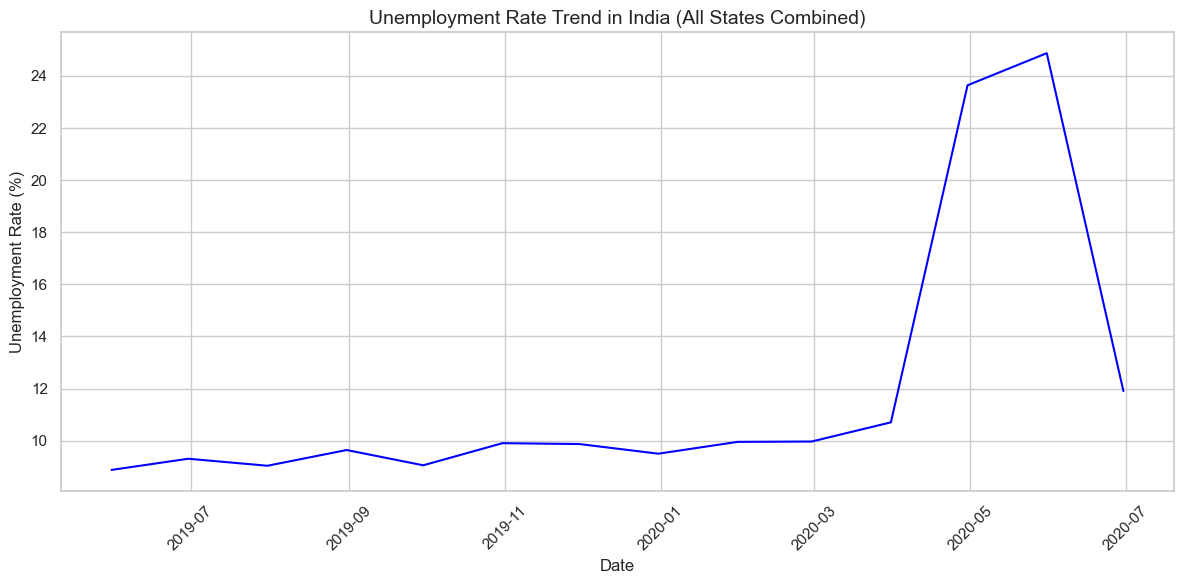

In [4]:
trend = df.groupby('date')['estimated_unemployment_rate_(%)'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=trend, x='date', y='estimated_unemployment_rate_(%)', color='blue')
plt.title("Unemployment Rate Trend in India (All States Combined)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

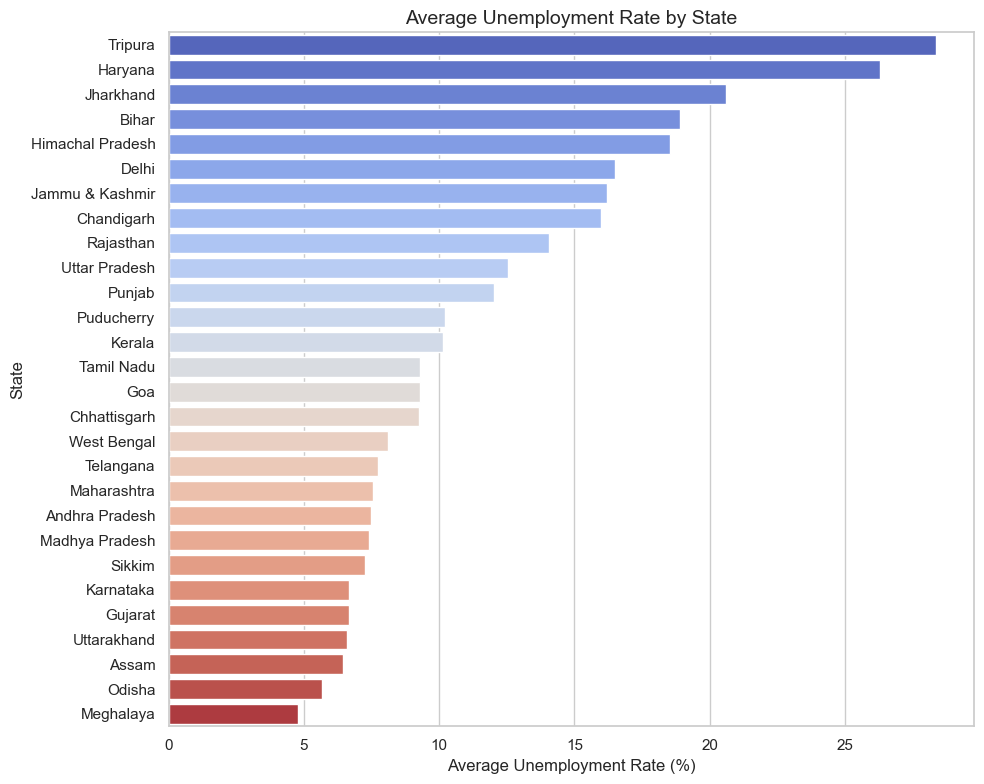

In [5]:
state_avg = df.groupby('state')['estimated_unemployment_rate_(%)'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=state_avg.values, y=state_avg.index, palette='coolwarm')
plt.title("Average Unemployment Rate by State", fontsize=14)
plt.xlabel("Average Unemployment Rate (%)")
plt.ylabel("State")
plt.tight_layout()
plt.show()

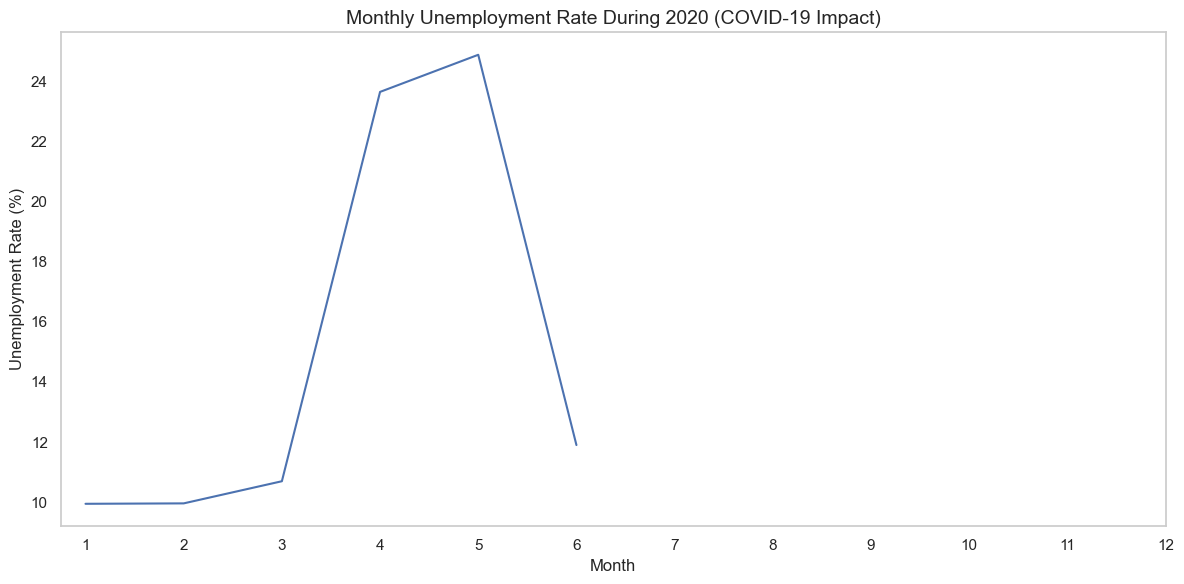

In [6]:
covid_2020 = df[df['year'] == 2020]

plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='estimated_unemployment_rate_(%)', data=covid_2020, ci=None)
plt.title("Monthly Unemployment Rate During 2020 (COVID-19 Impact)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(range(1,13))
plt.grid()
plt.tight_layout()
plt.show()

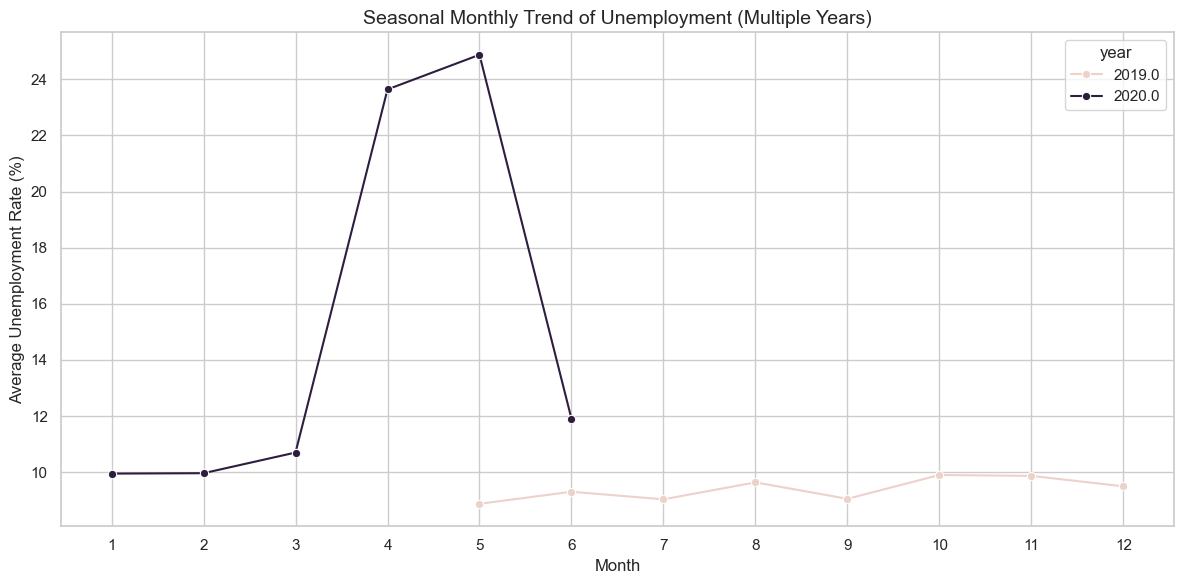

In [7]:
monthly_avg = df.groupby(['year', 'month'])['estimated_unemployment_rate_(%)'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg, x='month', y='estimated_unemployment_rate_(%)', hue='year', marker='o')
plt.title("Seasonal Monthly Trend of Unemployment (Multiple Years)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Average Unemployment Rate (%)")
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()